In [167]:
from alpha_vantage.timeseries import TimeSeries
from alpha_vantage.techindicators import TechIndicators
from alpha_vantage.sectorperformance import SectorPerformances
from alpha_vantage.cryptocurrencies import CryptoCurrencies
import matplotlib
import matplotlib.pyplot as plt
import os
# Make plots bigger
matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)
import time

from bs4 import BeautifulSoup 
import requests
import pandas as pd


In [134]:

#some examples - get Facebook, Apple stock value 
def parsePrice():
    r = requests.get('https://finance.yahoo.com/quote/FB?p=FB')
    soup = BeautifulSoup(r.text,"lxml")
    price = soup.find_all('div', {'class':'My(6px) Pos(r) smartphone_Mt(6px)'})[0].find('span').text
    
#     r= requests.get('https://finance.yahoo.com/quote/AAPL?p=AAPL')
#     soup = BeautifulSoup(r.text, "lxml")
#     price = soup.find_all('div', {'class' : "My(6px) Pos(r) smartphone_Mt(6px)"})[0].find('span').text

    return price

# while True:
#     print(parsePrice())

print(parsePrice())

212.99


In [173]:
#see if Alpha vantage has FNMA?
def parsePrice():
    r = requests.get('https://finance.yahoo.com/quote/FNMA?p=FNMA')
    soup = BeautifulSoup(r.text,"lxml")
    price = soup.find_all('div', {'class':'My(6px) Pos(r) smartphone_Mt(6px)'})[0].find('span').text
    
    return price

print(parsePrice())

2.2600


In [153]:

#getting companies filtered in order of most percentage change
names = []
#symbols store unique company identifier
symbols = []
prices = []
changes = []
percentChanges = []
#r = requests.get('https://finance.yahoo.com/gainers')
r = requests.get('https://finance.yahoo.com/most-active')
soup = BeautifulSoup(r.text, "lxml")
soup.prettify('utf-8')
for row in soup.find_all('tr', attrs={'class': 'simpTblRow'}):
    for symbol in row.find_all('td', attrs={'aria-label':'Symbol'}):
        symbols.append(symbol.text)
    for name in row.find_all('td', attrs={'aria-label':'Name'}):
        names.append(name.text)
    for price in row.find_all('td', attrs={'aria-label':'Price (Intraday)'}):
        #prices.append(price.find('span').text)
        prices.append(price.text)
    for change in row.find_all('td', attrs={'aria-label':'Change'}):
        #changes.append(change.find('span').text)
        changes.append(change.text)
    for percentChange in row.find_all('td', attrs={'aria-label':'% Change'}):
        percentChanges.append(percentChange.text)

In [158]:
print(symbols)
print(names)
# print(prices)
# print(changes)
# print(percentChanges)

['GE', 'F', 'NCLH', 'MRNA', 'CCL', 'AAL', 'DAL', 'UAL', 'BAC', 'AMD', 'WFC', 'BA', 'MRO', 'SIRI', 'UBER', 'DIS', 'INO', 'OXY', 'C', 'PBR', 'HAL', 'MGM', 'ABEV', 'VALE', 'ET', 'RCL', 'FCX', 'AAPL', 'SNAP', 'GSX', 'MSFT', 'NIO', 'T', 'NVAX', 'JD', 'ITUB', 'LUV', 'NOK', 'XOM', 'ZNGA', 'JPM', 'HST', 'AUY', 'CSCO', 'NLY', 'BBD', 'APA', 'BABA', 'GM', 'JBLU', 'PENN', 'VER', 'DKNG', 'KGC', 'GOLD', 'NVDA', 'FB', 'COTY', 'MU', 'CMCSA', 'VIAC', 'KO', 'PTON', 'GPS', 'SQ', 'PFE', 'GILD', 'PBR-A', 'LB', 'TWTR', 'SLB', 'BP', 'KSS', 'UAA', 'KMI', 'LYG', 'HPQ', 'PK', 'VIPS', 'WORK', 'SCHW', 'BSX', 'NRZ', 'RTX', 'INTC', 'TJX', 'CX', 'EXPE', 'TSLA', 'WPX', 'MS', 'QCOM', 'TSM', 'TEVA', 'GGB', 'LYFT', 'CGC', 'MT', 'VZ', 'IQ']
['General Electric Company', 'Ford Motor Company', 'Norwegian Cruise Line Holdings Ltd.', 'Moderna, Inc.', 'Carnival Corporation & Plc', 'American Airlines Group Inc.', 'Delta Air Lines, Inc.', 'United Airlines Holdings, Inc.', 'Bank of America Corporation', 'Advanced Micro Devices, I

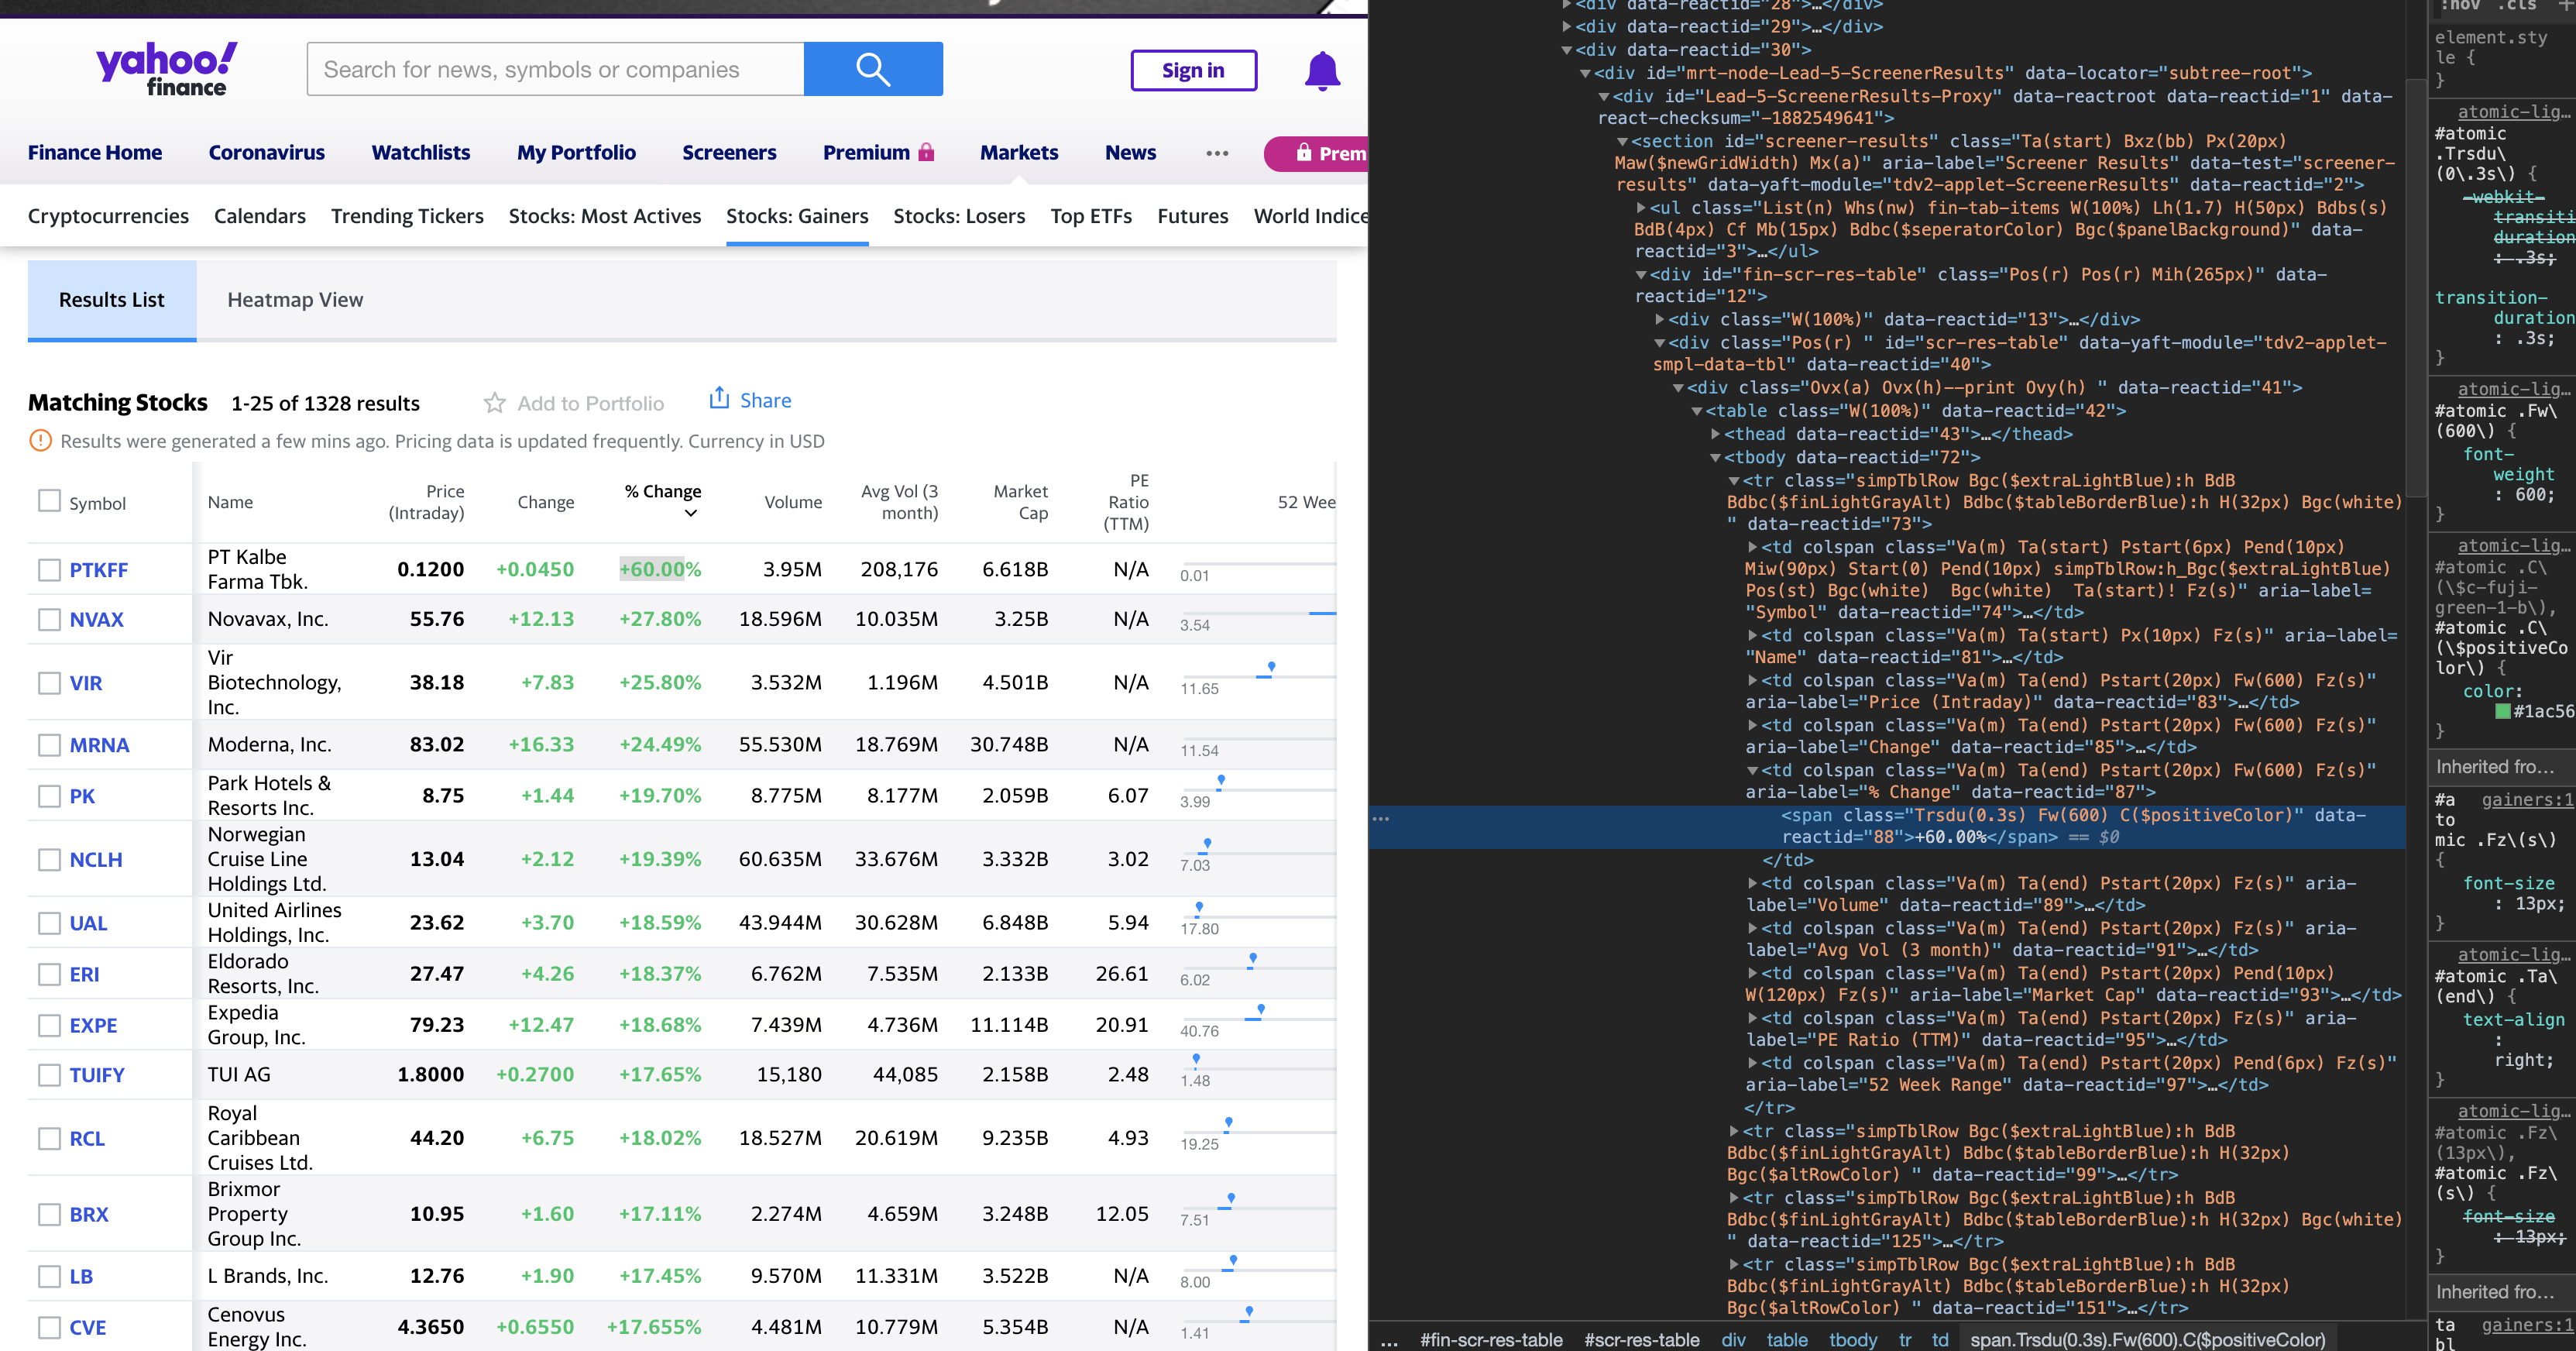

In [164]:

API_KEY = 'NL3CWQEZMABADZPX'
ts = TimeSeries(key=API_KEY, output_format='pandas')
data, meta_data = ts.get_intraday(symbol= symbols[3],interval='1min', outputsize='full')
data.describe()

#outputsize can be compact - returns last 100 points

,1. open,2. high,3. low,4. close,5. volume
count,1546.000000,1546.000000,1546.000000,1546.000000,1.546000e+03
mean,64.526101,64.657322,64.396597,64.529547,4.126762e+04
std,1.187999,1.189091,1.185071,1.185753,7.112013e+04
min,60.615000,60.890000,60.290000,60.668600,1.700000e+02
25%,63.650000,63.750000,63.522500,63.633100,1.597625e+04
50%,64.620800,64.750000,64.500000,64.630000,2.681650e+04
75%,65.300000,65.417500,65.167500,65.300000,4.697300e+04
max,67.500000,68.490000,67.188400,67.620000,2.120208e+06


{'1. Information': 'Intraday (1min) open, high, low, close prices and volume', '2. Symbol': 'MRNA', '3. Last Refreshed': '2020-05-15 16:00:00', '4. Interval': '1min', '5. Output Size': 'Full size', '6. Time Zone': 'US/Eastern'}


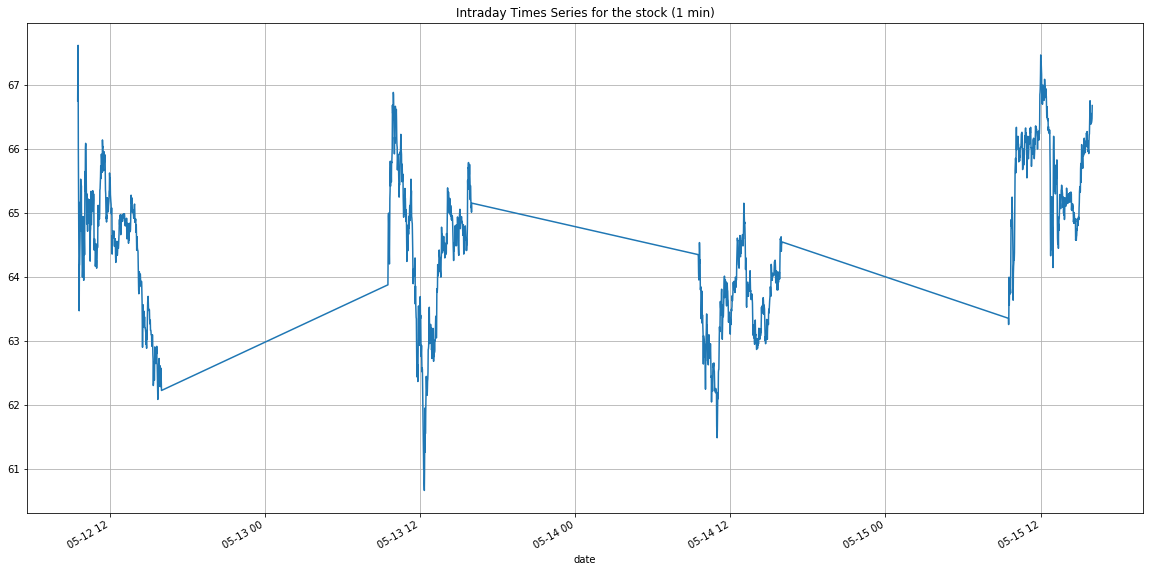

In [165]:
print(meta_data)
data['4. close'].plot()
plt.title('Intraday Times Series for the stock (1 min)')
plt.grid()
plt.show()

In [161]:
ts = TimeSeries(key=API_KEY, output_format='pandas')
while True:
    data,meta_data = ts.get_intraday(symbol=symbols[1], interval='1min', outputsize='compact')
    print(data)
    data.to_excel("output.xlsx")
    time.sleep(60)

                     1. open  2. high  3. low  4. close  5. volume
date                                                              
2020-05-18 14:13:00   5.2550   5.2568  5.2400     5.245   179446.0
2020-05-18 14:12:00   5.2450   5.2600  5.2432     5.250   344816.0
2020-05-18 14:11:00   5.2550   5.2600  5.2400     5.245   123837.0
2020-05-18 14:10:00   5.2526   5.2600  5.2500     5.250   212602.0
2020-05-18 14:09:00   5.2650   5.2700  5.2500     5.255   289461.0
...                      ...      ...     ...       ...        ...
2020-05-18 12:38:00   5.2650   5.2700  5.2600     5.265    54282.0
2020-05-18 12:37:00   5.2650   5.2700  5.2600     5.265    67985.0
2020-05-18 12:36:00   5.2651   5.2700  5.2600     5.265    71884.0
2020-05-18 12:35:00   5.2631   5.2700  5.2600     5.270   124315.0
2020-05-18 12:34:00   5.2652   5.2700  5.2600     5.265    98305.0

[100 rows x 5 columns]


KeyboardInterrupt: 

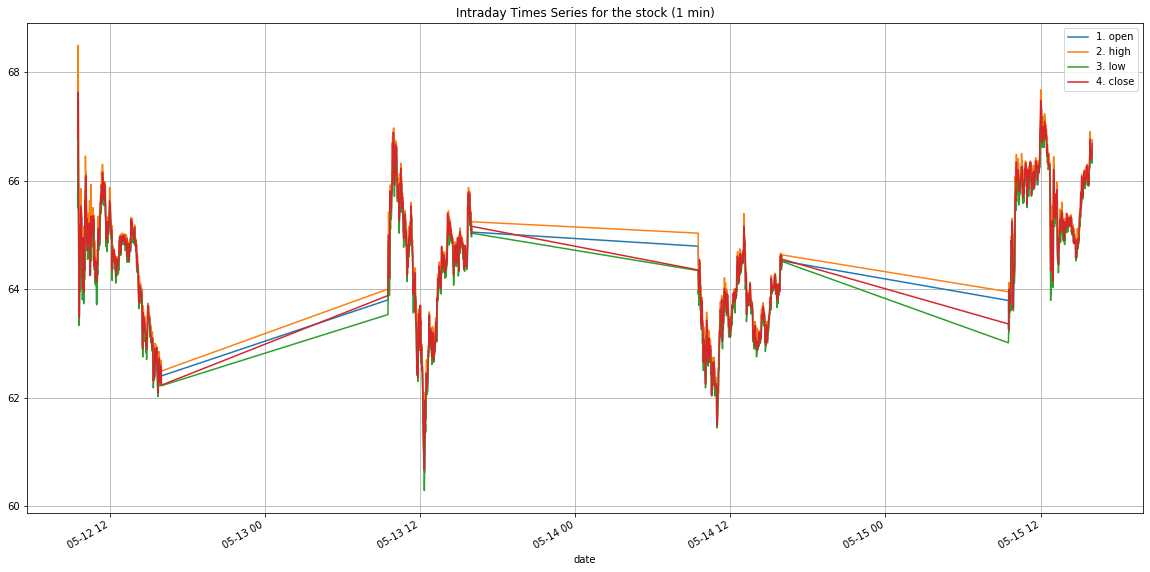

In [166]:
data = data.drop('5. volume',1)
data.plot()
plt.title('Intraday Times Series for the stock (1 min)')
plt.grid()
plt.show()

In [124]:
#experiment - fetch stock values for top 5 companies every minute and dump to dictionary 
from collections import defaultdict
stocks = defaultdict()

ts = TimeSeries(key=API_KEY, output_format='pandas')
while True:
    for i in range(5):
        data, meta_data = ts.get_intraday(symbol= symbols[i], interval='1min', outputsize='compact')
        print(data)
        if symbols[i] not in stocks:
            stocks[symbols[i]]=[]
        stocks[symbols[i]].append(data)
        print(symbols[i])
    time.sleep(60)

                     1. open  2. high  3. low  4. close  5. volume
date                                                              
2020-05-15 15:50:00    21.03    21.03   21.03     21.03    17000.0
2020-05-15 15:13:00    20.00    20.00   20.00     20.00      595.0
2020-05-15 12:50:00    21.03    21.03   21.03     21.03     3799.0
2020-05-13 11:46:00    16.50    16.50   16.50     16.50     5389.0
NEXOF
                     1. open  2. high  3. low  4. close  5. volume
date                                                              
2020-05-15 15:58:00   20.790    20.79  20.790     20.79     5950.0
2020-05-15 15:56:00   20.790    20.79  20.790     20.79     5950.0
2020-05-15 15:50:00   21.000    21.00  21.000     21.00    17000.0
2020-05-15 15:34:00   21.000    21.00  21.000     21.00      284.0
2020-05-15 15:17:00   20.250    20.25  20.250     20.25      293.0
2020-05-15 15:08:00   20.750    20.75  20.750     20.75      772.0
2020-05-15 15:05:00   20.900    20.90  20.900     20.90 

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [125]:
print(stocks)

defaultdict(None, {'NEXOF': [                     1. open  2. high  3. low  4. close  5. volume
date                                                              
2020-05-15 15:50:00    21.03    21.03   21.03     21.03    17000.0
2020-05-15 15:13:00    20.00    20.00   20.00     20.00      595.0
2020-05-15 12:50:00    21.03    21.03   21.03     21.03     3799.0
2020-05-13 11:46:00    16.50    16.50   16.50     16.50     5389.0], 'NEXOY': [                     1. open  2. high  3. low  4. close  5. volume
date                                                              
2020-05-15 15:58:00   20.790    20.79  20.790     20.79     5950.0
2020-05-15 15:56:00   20.790    20.79  20.790     20.79     5950.0
2020-05-15 15:50:00   21.000    21.00  21.000     21.00    17000.0
2020-05-15 15:34:00   21.000    21.00  21.000     21.00      284.0
2020-05-15 15:17:00   20.250    20.25  20.250     20.25      293.0
2020-05-15 15:08:00   20.750    20.75  20.750     20.75      772.0
2020-05-15 15:05:00  